In [1]:
import pandas as pd


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 设置文件路径
base_path = Path("data")  # 本地运行请改为对应目录，例如 Path("/mnt/data") 用于 ChatGPT 环境
files = {
    "ML-based Methods": "Scopus-10-Analyze-Year_ML.csv",
    "DL-based Methods": "Scopus-10-Analyze-Year_DL.csv",
    "Total Publications": "Scopus-10-Analyze-Year_full.csv"
}

def extract_year_count_lines(filepath):
    """从Scopus分析文件中提取年份和计数"""
    with open(filepath, "r", encoding="utf-8") as f:
        lines = f.readlines()

    # 找到包含 "YEAR" 的起始行
    start_idx = None
    for idx, line in enumerate(lines):
        if "YEAR" in line:
            start_idx = idx + 1
            break

    if start_idx is None:
        raise ValueError(f"No 'YEAR' line found in {filepath}")

    # 提取有效数据行
    data = []
    for line in lines[start_idx:]:
        line = line.strip().replace('"', '')
        if not line:
            continue
        parts = line.split(",")
        if len(parts) == 2:
            year, count = parts
            try:
                data.append((int(year), int(count)))
            except ValueError:
                continue

    return pd.DataFrame(data, columns=["Year", "Count"]).set_index("Year")

# 读取所有文件
all_data = {}
for label, filename in files.items():
    path = base_path / filename
    try:
        df = extract_year_count_lines(path)
        all_data[label] = df
    except Exception as e:
        print(f"Error parsing {filename}: {e}")

# 合并所有数据为一个 DataFrame
merged_df = pd.concat(all_data.values(), axis=1)
merged_df.columns = all_data.keys()
merged_df = merged_df.sort_index()

filtered_df = merged_df.drop(index=2026, errors="ignore")



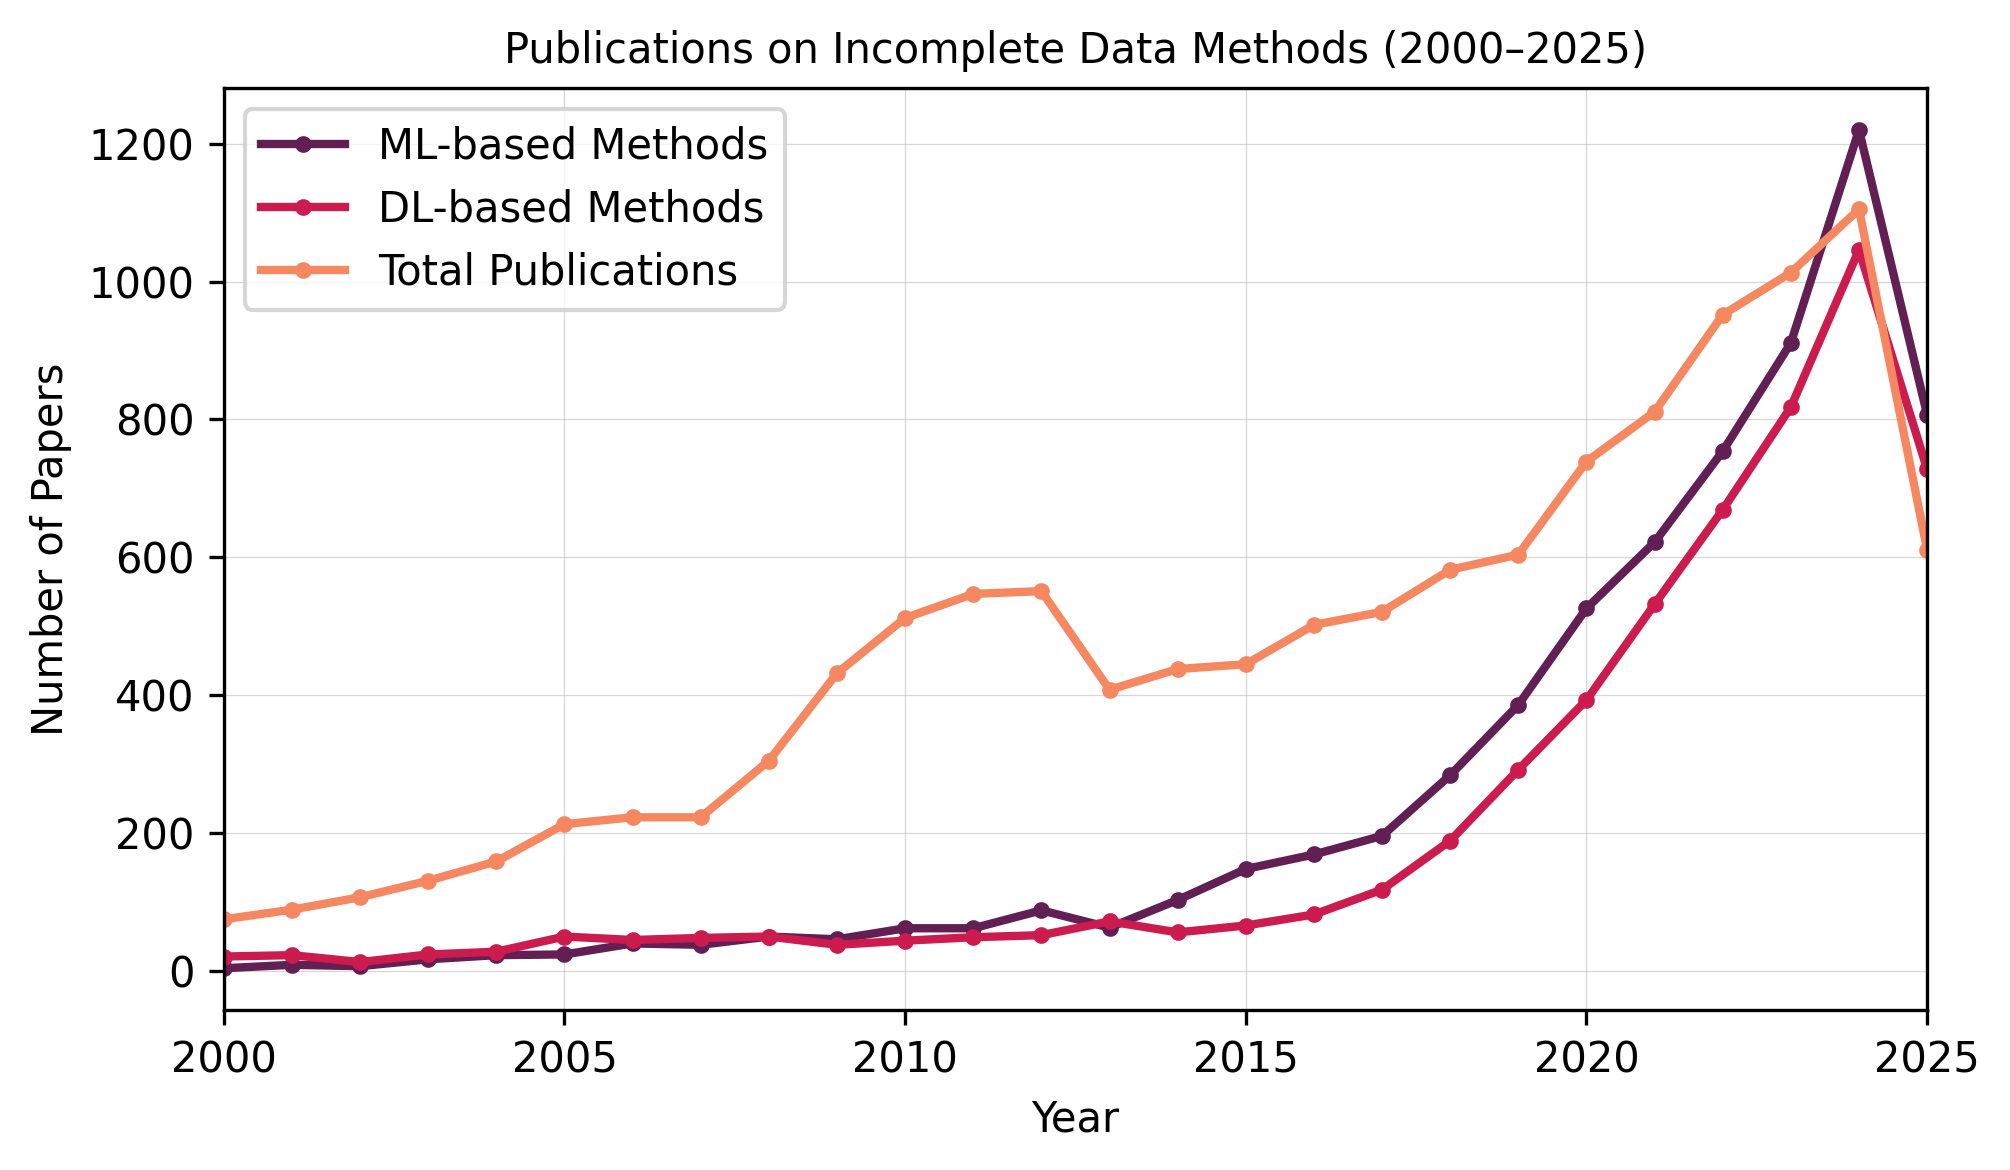

In [59]:
# 绘制折线图而非堆叠面积图（line chart 替代 stackplot）
plt.figure(figsize=(6.8, 4), dpi=300)
colors = sns.color_palette("rocket", n_colors=len(filtered_df.columns))

for idx, col in enumerate(filtered_df.columns):
    plt.plot(filtered_df.index, filtered_df[col], label=col, color=colors[idx], linewidth=2,marker =".")

plt.title("Publications on Incomplete Data Methods (2000–2025)", fontsize=10)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Number of Papers", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(2000, 2025)
plt.legend(loc="upper left", fontsize=10)
plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("fig_imputation_trends.pdf", bbox_inches='tight')
plt.show()



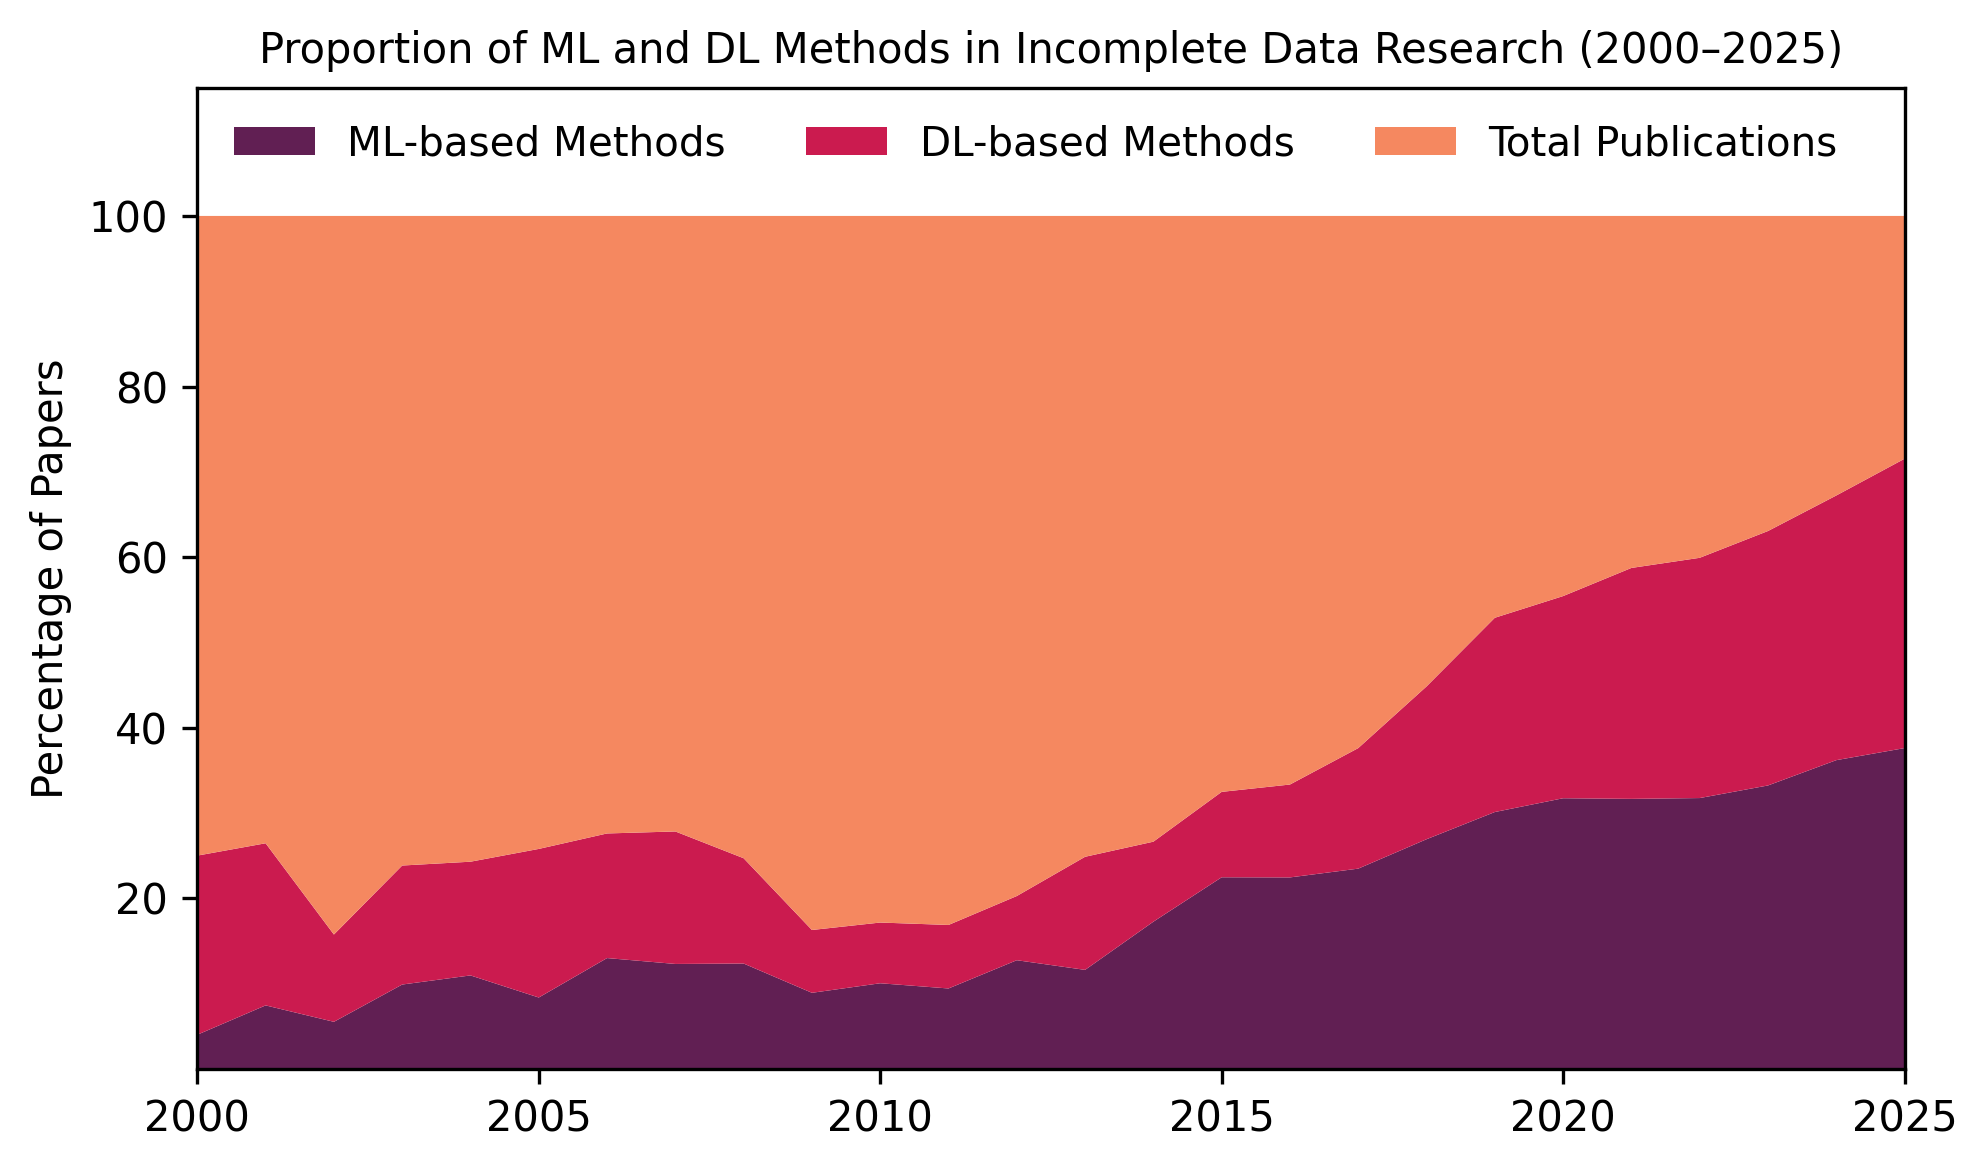

In [49]:
# 使用用户提供的 filtered_df 数据，生成百分比堆叠面积图

# 创建百分比版本的 DataFrame
df_percent = filtered_df.div(filtered_df.sum(axis=1), axis=0) * 100

# 绘制图形
plt.figure(figsize=(6.8, 4), dpi=300)
colors = sns.color_palette("rocket", n_colors=len(df_percent.columns))

plt.stackplot(df_percent.index,
              [df_percent[col].values for col in df_percent.columns],
              labels=df_percent.columns,
              colors=colors)

plt.title("Proportion of ML and DL Methods in Incomplete Data Research (2000–2025)", fontsize=10)
#plt.xlabel("Year", fontsize=10)
plt.ylabel("Percentage of Papers", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks([ 20, 40, 60, 80, 100], fontsize=10)
plt.xlim(2000,2025)
plt.ylim(0,115)
plt.legend(loc="upper left", fontsize=9.7, frameon=False, ncol=3)

#plt.grid(True, linewidth=0.3, alpha=0.5)
plt.tight_layout()
plt.savefig("fig_imputation_proportion.pdf", bbox_inches='tight')
plt.show()
